<a href="https://colab.research.google.com/github/Shailendrayadav0666/Projects/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraies
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Activation,Flatten
from keras.models import load_model
from keras.models import Sequential

batch_size=32
num_classes=10
epochs=10


#load the cifar10 dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#display the shape/dimensions
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],'test samples')

#format our training data by normalizing and changing data type
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255

#one hot encode label outputs 
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

#prepare the model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#initiate RMSprop optimizer and configure some parameters
opt=keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)

#lets create our model
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

print(model.summary())

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 6

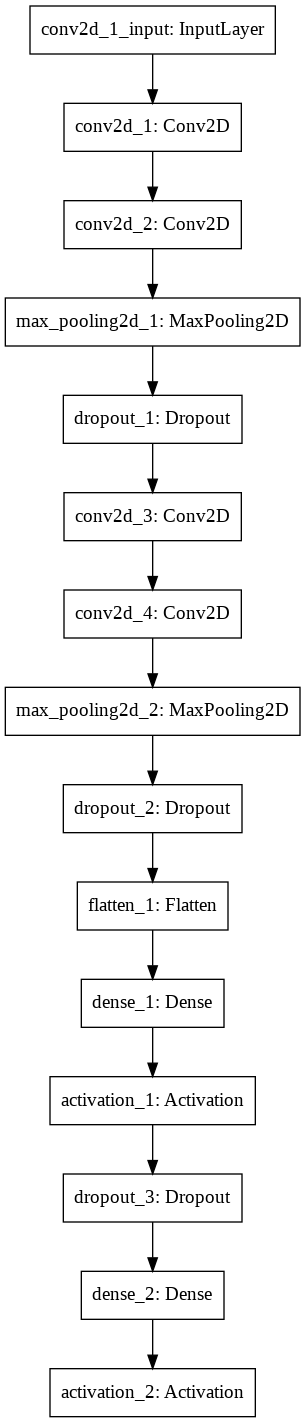

In [ ]:
#plotting the model
keras.utils.plot_model(model,to_file='model_cifar.png')

In [4]:
#Training the model
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)
model.save('cifar_simple_cnn_2.h5')
#evaluate the performance of our traind model
scores=model.evaluate(x_test,y_test,verbose=1)
print('test loss',scores[0])
print('test accuracy:',scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 247s 5ms/step - loss: 1.8173 - accuracy: 0.3330 - val_loss: 1.5334 - val_accuracy: 0.4463
Epoch 2/10
50000/50000 [==============================] - 250s 5ms/step - loss: 1.4924 - accuracy: 0.4589 - val_loss: 1.3346 - val_accuracy: 0.5129
Epoch 3/10
50000/50000 [==============================] - 247s 5ms/step - loss: 1.3437 - accuracy: 0.5163 - val_loss: 1.2365 - val_accuracy: 0.5645
Epoch 4/10
50000/50000 [==============================] - 247s 5ms/step - loss: 1.2419 - accuracy: 0.5572 - val_loss: 1.1230 - val_accuracy: 0.6051
Epoch 5/10
50000/50000 [==============================] - 248s 5ms/step - loss: 1.1618 - accuracy: 0.5879 - val_loss: 1.0606 - val_accuracy: 0.6304
Epoch 6/10
50000/50000 [==============================] - 244s 5ms/step - loss: 1.0949 - accuracy: 0.6151 - val_loss: 1.0242 - val_accuracy: 0.6457
Epoch 7/10
50000/50000 [==============================] - 247s

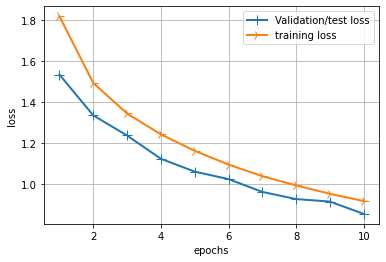

In [8]:
#plotting our loss charts
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/test loss')
line2=plt.plot(epochs,loss_values,label='training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0, marker='4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.show()

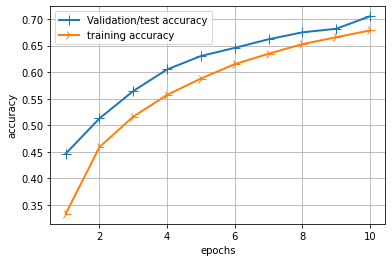

In [9]:
#plotting our accuracy charts
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['accuracy']
val_loss_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/test accuracy')
line2=plt.plot(epochs,loss_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0, marker='4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [21]:
#lets run some tests
import cv2
import numpy as np
from keras.models import load_model

img_row,img_height,img_depth=32,32,3
classifier=load_model('cifar_simple_cnn_2.h5')
color=True
scale=8

def draw_test(name,res,input_im,scale,img_row,img_height):
  BLACK=[0,0,0]
  res=int(res)
  if res==0:
    pred='airplane'
  if res==1:
    pred='automobile'
  if res==2:
    pred='bird'
  if res==3:
    pred='cat'
  if res==4:
    pred='deer'
  if res==5:
    pred='frog'
  if res==7:
    pred='horse'
  if res==8:
    pred='ship'
  if res==9:
    pred='truck'

  expanded_image=cv2.copyMakeBorder(input_im,0,0,0 ,imageL.shape[0]*2,cv2.BORDER_CONSTANT,value=BLACK)
  if color==False:
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(300,80),cv2.FONT_HERSHEY_COMPLEX_SMALL,3,(0,255,0),2)
    cv2.imshow(name,expanded_image)


  for i in range(0,10):
    rand=np.random.randint(0,len(x-test))
    input_im=x_test[rand]
    imageL=cv2.resize(input_im,None,fx=scale,interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,img_row,img,height,img_depth)
    cv2.waitley(0)

cv2.destroyAllWindows()